# COGS 108 - Final Project 

# Overview

We are analyzing data on unemployment rates to summarize the state of the economy, median incomes for a variety of majors, and numbers of students in given majors. We will be comparing these data sets to determine if unemployment rates influence major selection, and compare the median earnings to popular and unpopular majors to attempt to find trends. Using our findings, we found that….  !

# Names

- Carolyn Sanford
- Tuong Tang
- Danielle Zusman
- Thomas Dailey
- Jiaao Mo

# Group Members IDs

- A14737810
- A14702369
- A13847129
- A15716898
- A15724489

# Research Question

● Which majors are becoming most popular - country wide? 

● What does major popularity say about the state of the economy?

# Background and Prior Work

The datasets that consists of this project will be the types of varying majors that are offered in various schools in the United States from across a period of 1900s to present day along with majors in STEM which are shown in categories of race, sex and the level of the degree upon graduation. Alongside these datasets there are the number of employed and unemployed graduates and their major and the market for recent graduates based on major. Based on the datasets we found that STEM majors are becoming more of a focus on the majors by graduation and this growth has been shown in the recent years.

In comparison to projects that have already looked at similar datasets we noticed that the Hamilton Project released their findings as they looked at annual earnings over a career by degree and major as they took a dataset with a sample of 80 majors and compared their lifetime earnings. Alongside this they also took a distribution and earnings difference to associate which majors are culminating into higher margins based on percentile for the number of graduates in those majors and comparing these percentiles with different majors. They discovered that even the graduates in the highest earning majors will be out earned by some graduates in majors which on average would be more likely to earn less overall.

Overall our project consists of these datasets and we ask the questions of how majors are affected by gender and ethnicity alongside the majors that are becoming more offered and decided by universities across the United States. There are also ethical considerations that link to privacy of data and how we can assure that this data remains private. Lastly we do not pass judgement or measure the worth of a major based on our questions rather we are assessing how this data can help future and current graduates look at majors and find out any questions that might be related to the ones that are being asked and assessed in this project.

References (include links):

- 1) https://www.hamiltonproject.org/papers/major_decisions_what_graduates_earn_over_their_lifetimes https://nces.ed.gov/programs/coe/indicator_cta.asp
- 2)

# Hypothesis

Hypothesis: Students tend to pursue majors in STEM fields when the economy is struggling, and have more diversity of majors in times of economic prosperity.

We chose this topic because we wanted to get a better understanding of why certain fields are more popular than others, and see if there is a correlation with the economic crisis on major selection. It is our assumption that in times of economic uncertainty, people would be more likely to go into what is considered safe fields that will provide a steady income. This is typically thought of as STEM fields. 


# Ethics & Privacy

We are using datasets pulled from the National Center for Education Statistics (NCES). NCES is under the U.S. Department of Education (and a .gov site) all published government data is free for public use. We are relying on NCES/U.S.ED data collection standards to insure privacy. The non-NCES datasets have Creative Commons license allowing us to us it to share and adapt the data. None of the data we are looking at exposes personally identifiable information, so we have no privacy concerns. We are not passing any sort of judgement towards STEM vs Liberal Arts, we are just measuring the impact of economics on the enrollment of the two. At this point, we do not anticipate any issues with ethical concerns but we will remain vigilant to see if some arise. If they do, we will come up with a plan and implement it before presenting out findings.

# Dataset(s)

● Degrees granted from postsecondary schools receiving title IV aid from select years in 1970-2017:
https://nces.ed.gov/programs/digest/d10/tables/dt10_329.asp
https://nces.ed.gov/programs/digest/d10/tables/dt10_330.asp
https://nces.ed.gov/programs/digest/d10/tables/dt10_328.asp
https://nces.ed.gov/programs/digest/d10/tables/dt10_327.asp
https://nces.ed.gov/programs/digest/d10/tables/dt10_326.asp
https://nces.ed.gov/programs/digest/d10/tables/dt10_325.asp
https://nces.ed.gov/programs/digest/d10/tables/dt10_324.asp
https://nces.ed.gov/programs/digest/d10/tables/dt10_323.asp
https://nces.ed.gov/programs/digest/d10/tables/dt10_322.asp
https://nces.ed.gov/programs/digest/d10/tables/dt10_319.asp
https://nces.ed.gov/programs/digest/d10/tables/dt10_318.asp
https://nces.ed.gov/programs/digest/d10/tables/dt10_317.asp
https://nces.ed.gov/programs/digest/d10/tables/dt10_316.asp

● Degrees granted in stem fields broken down by race, sex, and level of degree: https://nces.ed.gov/programs/digest/d18/tables/dt18_318.45.asp

● This dataset offers number of employed & unemployed college grads, categorized by majors https://data.world/fivethirtyeight/college-majors

● Outcomes of Education Labor Market Outcomes for Recent Bachelor's Degree Completers https://data.world/nces/market-for-rec-college-grads


# Setup

In [2]:
%matplotlib inline

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as colors
import matplotlib.cm as cmap
from matplotlib.font_manager import FontProperties
import patsy
import statsmodels.api as sm

# Data Cleaning

For formating, we imported the data into excel for aesthetics, and combined data sets to create relevant and convenient files. For basic cleaning, we checked the data for any zeros and NaN values. It typically meant that data had not yet been collected for that period.

We found the proportional percent per major per year to normalize the raw data on total graduates from programs receiving title IV aid. Normalization is important because we want to reduce the risk of having disproportionate data considering the change in people attending college as it becomes more “popular” throughout the years. Normalizing the data helped clean it and remove potential bias, making it easier to understand the data in context. 

Bachelor's degrees conferred by postsecondary institutions, by field of study: Selected years, 1970-71 through 2016-17

***

# MAJORS BY YEAR

In [3]:
# df_MajorsByYear = pd.read_csv('MajorsByYear.csv')
# df_MajorsByYear

In [4]:
# #Extract the total row from MajorsByYears
# total_row = df_MajorsByYear[0:1]

# for col in df_MajorsByYear:
#     # ignore the string values
#     if(df_MajorsByYear[col].dtype == np.float64 or df_MajorsByYear[col].dtype == np.int64):
#         # calculate percentage
#         df_MajorsByYear[col] = round((df_MajorsByYear[col] / total_row[col].values[0]) * 100, 2)

In [5]:
# # extract 6 majors we intended to graph
# bio = df_MajorsByYear[4:5]
# busi = df_MajorsByYear[5:6]
# eng = df_MajorsByYear[10:11]
# english_lit = df_MajorsByYear[12:13]
# psy = df_MajorsByYear[27:28]
# phy =  df_MajorsByYear[24:25]

# # joining them into one single dataframe
# six_majors = pd.concat( [bio, busi, eng, english_lit, psy, phy] )
# six_majors.set_index('Field of study', inplace=True)

# # keep only the significant years, easier for graphing
# six_majors = six_majors.rename(columns = lambda x : str(x)[:-3])
# six_majors.columns = six_majors.columns.map(int)

# # This is for referral
# six_majors = six_majors.T
# six_majors.columns = ['Year' if x=='Field of study' else x for x in six_majors.columns]
# six_majors

In [6]:
# # gather arrays to graph
# y1 = six_majors['Biological and biomedical sciences ']
# y2 = six_majors['Business']
# y3 = six_majors['Engineering']
# y4 = six_majors['English language and literature/letters']
# y5 = six_majors['Psychology']
# y6 = six_majors['Philosophy and religious studies']

# # set larger size for graph
# plt.figure(figsize=(20,10))

# # now graph them
# plt.plot( y1, label = 'Biological and biomedical sciences' )
# plt.plot( y2, label = 'Business' )
# plt.plot( y3, label = 'Engineering' )
# plt.plot( y4, label = 'English language and literature/letters' )
# plt.plot( y5, label = 'Psychology' )
# plt.plot( y6, label = 'Philosophy and religious studies' )
# plt.xlabel('Year')
# plt.ylabel('Percentage')

# # change interval from 10 to 5 years
# plt.xticks(np.arange(1970, 2016, 5)) 
# plt.legend()

***

# Labor Force Statistics from the Current Population Survey

Labor Force Statistics from the Current Population Survey					
Original Data Value					
					
Series Id:	LNS14000000				
Seasonally Adjusted					
Series title:	(Seas) Unemployment Rate				
Labor force status:	Unemployment rate				
Type of data:	Percent or rate				
Age:	16 years and over				
Years:	1970 to 2019

In [7]:
# import dataset for unemployment rates
df_UnemploymentRates = pd.read_csv('UnemploymentRates.csv')
#df_UnemploymentRates.drop([39:49], axis = 0)
df_UnemploymentRates = df_UnemploymentRates.iloc[0:39]
df_UnemploymentRates = df_UnemploymentRates.set_index('Year')
df_UnemploymentRates.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1970,3.9,4.2,4.4,4.6,4.8,4.9,5.0,5.1,5.4,5.5,5.9,6.1
1971,5.9,5.9,6.0,5.9,5.9,5.9,6.0,6.1,6.0,5.8,6.0,6.0
1972,5.8,5.7,5.8,5.7,5.7,5.7,5.6,5.6,5.5,5.6,5.3,5.2
1973,4.9,5.0,4.9,5.0,4.9,4.9,4.8,4.8,4.8,4.6,4.8,4.9
1974,5.1,5.2,5.1,5.1,5.1,5.4,5.5,5.5,5.9,6.0,6.6,7.2


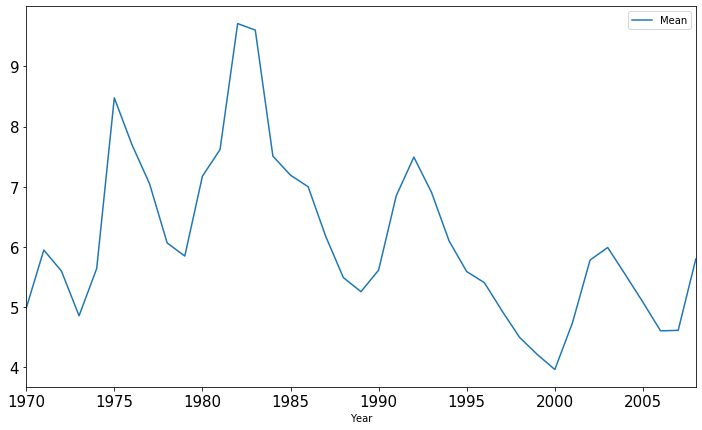

In [8]:
# calculate a mean column
df_UnemploymentRates['Mean']=df_UnemploymentRates.loc[:,'Jan':'Dec'].mean(axis=1)

# make a plot of Mean
df_UnemploymentRates.plot( y='Mean',figsize=(12,7),fontsize=15)

***

# EXPECTED INCOME 

In [9]:
# inmport dataset for expected income
# df_income_expected = pd.read_csv('degrees-that-pay-back.csv')
# df_income_expected

***

# POPULAR MAJORS FROM 1970 TO 2008

In [10]:
# new dataset. built by combining majors from several files by "total"
df_combinedMajors = pd.read_csv('Cogs108_data.csv')

In [11]:
# change index to Year
df_combinedMajors = df_combinedMajors.set_index('Year')
df_combinedMajors.head()

,Economics,History,Political science and government,Sociology,Visual and Performing arts,Social Sciences,Public Administration,Pyschology,Chemistry,Geology,...,Electrical Engineering,Mechanical Engineering,Engineering,Biomedical,Biology,Microbiology,Zoology,Business,Communication,Computer Science
Year,,,,,,,,,,,,,,,,,,,,,
1970-71,15758,44663,27482,33263,30394,155324,5466,38187,11061,3312,...,12198,8858,50182,35683,26294,1475,5721,115396,10802,2388
1971-72,15231,43695,28135,35216,33831,158060,7508,43433,10588,3766,...,12101,8530,51258,37269,27473,1548,5518,121917,12340,3402
1972-73,14770,40943,30100,35436,36017,155970,10690,47940,10124,4117,...,12313,8523,51384,42205,31185,1940,5763,126717,14317,4304
1973-74,14285,37049,30744,35491,39730,150320,11966,52139,10430,4526,...,11316,7677,50412,48224,36188,2311,6128,132304,17096,4756
1974-75,14046,31470,29126,31488,40782,135190,13661,51245,10541,4566,...,10161,6890,47131,51576,38748,2767,6110,133639,19248,5033


In [12]:
# keep only the significant years, easier for graphing
df_combinedMajors = df_combinedMajors.rename(index = lambda x : str(x)[:-3])

# we see that 1999-2000 has extra numbers compared to the rest of the years, so manually modify it
df_combinedMajors.rename(index = {"1999-2": "1999"}, inplace = True) 
#df_combinedMajors.index = df_combinedMajors.index.map(int)

In [13]:
# calculate percentage for each cell
df_combinedMajors = df_combinedMajors.apply(lambda x: round((x/x.sum())*100,2), axis=1)

# MAJOR DISTRIBUTION IN 1970?
##  maybe we need, maybe not

Economics                            1.96
History                              5.55
Political science and government     3.42
Sociology                            4.14
Visual and Performing arts           3.78
Social Sciences                     19.31
Public Administration                0.68
Pyschology                           4.75
Chemistry                            1.38
Geology                              0.41
Physics                              0.63
Physical Science                     2.66
Mathematics                          3.08
Health                               3.14
Foreign Languages                    2.46
English                              7.95
Chemical Engineering                 0.45
Civil Engineering                    0.81
Electrical Engineering               1.52
Mechanical Engineering               1.10
Engineering                          6.24
Biomedical                           4.44
Biology                              3.27
Microbiology                      

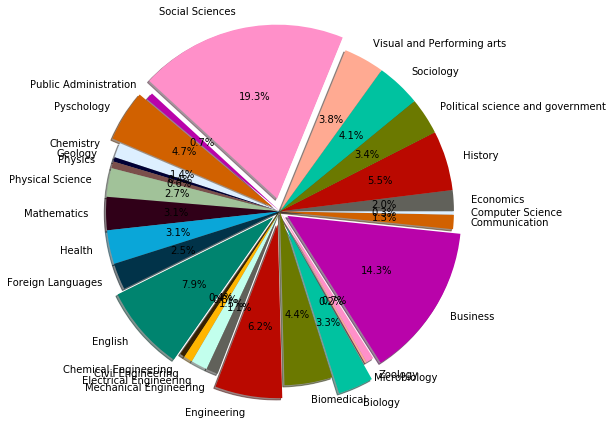

In [20]:
colors = [ "#61615A", "#BA0900", "#6B7900", "#00C2A0", "#FFAA92", "#FF90C9", "#B903AA", "#D16100",
        "#DDEFFF", "#000035", "#7B4F4B", "#A1C299", "#300018", "#0AA6D8", "#013349", "#00846F",
        "#372101", "#FFB500", "#C2FFED"]
x1 = df_combinedMajors.loc['1970']

explode = (0, 0, 0, 0, 0, 0.15, 0, 0.1, 0, 0, 0, 0, 0, 0, 0, 0.1, 0, 0, 0, 0, 0.15, 0, 0.2, 0, 0, 0.1, 0, 0)

#convert first column to list 
x2 = list(df_combinedMajors.columns)

plt.pie(x1, labels = x2, radius = 2, autopct = '%0.1f%%', colors = colors, explode = explode, shadow = True)
df_combinedMajors.loc['1970']

Economics                            1.72
History                              2.39
Political science and government     2.84
Sociology                            2.05
Visual and Performing arts           6.01
Social Sciences                     11.64
Public Administration                1.59
Pyschology                           6.36
Chemistry                            0.76
Geology                              0.24
Physics                              0.33
Physical Science                     1.47
Mathematics                          1.07
Health                               6.63
Foreign Languages                    1.21
English                              3.97
Chemical Engineering                 0.31
Civil Engineering                    0.66
Electrical Engineering               1.01
Mechanical Engineering               1.14
Engineering                          5.88
Biomedical                           4.99
Biology                              3.52
Microbiology                      

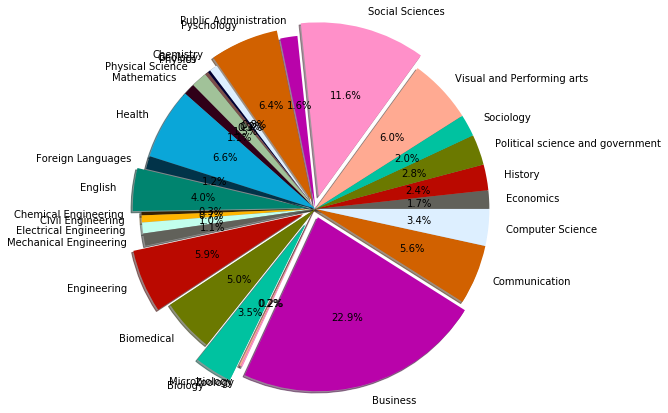

In [19]:
colors = [ "#61615A", "#BA0900", "#6B7900", "#00C2A0", "#FFAA92", "#FF90C9", "#B903AA", "#D16100",
        "#DDEFFF", "#000035", "#7B4F4B", "#A1C299", "#300018", "#0AA6D8", "#013349", "#00846F",
        "#372101", "#FFB500", "#C2FFED"]
x2 = df_combinedMajors.loc['2005']

explode = (0, 0, 0, 0, 0, 0.15, 0, 0.1, 0, 0, 0, 0, 0, 0, 0, 0.1, 0, 0, 0, 0, 0.15, 0, 0.2, 0, 0, 0.1, 0, 0)

#convert first column to list 
x3 = list(df_combinedMajors.columns)

plt.pie(x2, labels = x3, radius = 2, autopct = '%0.1f%%', colors = colors, explode = explode, shadow = True)
df_combinedMajors.loc['2005']

***

# GRAPHS OF SIX MAJORS WE CHOOSE TO ANALYZE

###### Below are graphs for
1. Business
2. English
3. Engineering
4. Psychology
5. Biology
6. Social Sciences

In [370]:
# Select the majors we want to filter out
six_majors = df_combinedMajors[['Biology','Business', 'Engineering','English','Pyschology','Social Sciences']]
df_matrix = six_majors.copy()
six_majors = six_majors.iloc[::5, :]
six_majors


,Biology,Business,Engineering,English,Pyschology,Social Sciences
Year,,,,,,
1970,3.27,14.35,6.24,7.95,4.75,19.31
1975,4.73,16.87,5.50,4.88,5.92,14.89
1980,3.52,22.53,8.47,3.59,4.61,11.29
1985,2.84,24.33,9.98,3.50,4.18,9.65
1990,2.83,24.07,7.70,4.93,5.67,12.09
1995,4.07,20.60,7.10,4.54,6.67,11.50
2000,3.67,22.85,6.33,4.39,6.39,11.10
2005,3.52,22.93,5.88,3.97,6.36,11.64


### Graph of 6 majors 1970-2005

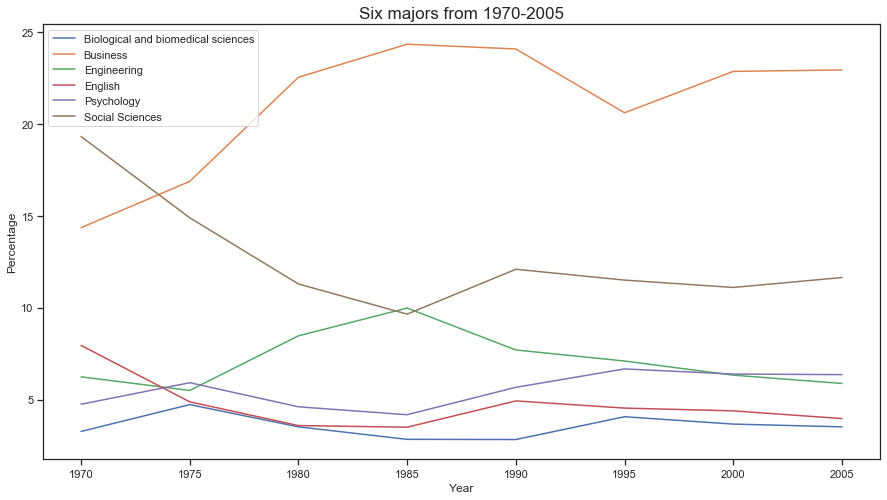

In [371]:
# x values
x = np.arange(1970,2005+1,5)

# extract 6 majors we intended to graph
y1 = six_majors['Biology']
y2 = six_majors['Business']
y3 = six_majors['Engineering']
y4 = six_majors['English']
y5 = six_majors['Pyschology']
y6 = six_majors['Social Sciences']

# set larger size for graph
plt.figure(figsize=(15,8))

# now graph them
plt.plot( x, y1, label = 'Biological and biomedical sciences' )
plt.plot( x, y2, label = 'Business' )
plt.plot( x, y3, label = 'Engineering' )
plt.plot( x, y4, label = 'English' )
plt.plot( x, y5, label = 'Psychology' )
plt.plot( x, y6, label = 'Social Sciences' )

# for cosmetics
plt.xlabel('Year', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.title("Six majors from 1970-2005", fontsize=17) 
plt.legend()

***

## Six majors from 1970-2005  vs. Unemployment Rates
Now we want to add unemployment rates into the above graph for further analysis

In [372]:
# Filter out the unemployment rates for every 5 years since 1970
unemploy_rates_5years = df_UnemploymentRates.iloc[::5, :]
unemploy_rates_5years

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Mean
Year,,,,,,,,,,,,,
1970,3.9,4.2,4.4,4.6,4.8,4.9,5.0,5.1,5.4,5.5,5.9,6.1,4.983333
1975,8.1,8.1,8.6,8.8,9.0,8.8,8.6,8.4,8.4,8.4,8.3,8.2,8.475000
1980,6.3,6.3,6.3,6.9,7.5,7.6,7.8,7.7,7.5,7.5,7.5,7.2,7.175000
1985,7.3,7.2,7.2,7.3,7.2,7.4,7.4,7.1,7.1,7.1,7.0,7.0,7.191667
1990,5.4,5.3,5.2,5.4,5.4,5.2,5.5,5.7,5.9,5.9,6.2,6.3,5.616667
1995,5.6,5.4,5.4,5.8,5.6,5.6,5.7,5.7,5.6,5.5,5.6,5.6,5.591667
2000,4.0,4.1,4.0,3.8,4.0,4.0,4.0,4.1,3.9,3.9,3.9,3.9,3.966667
2005,5.3,5.4,5.2,5.2,5.1,5.0,5.0,4.9,5.0,5.0,5.0,4.9,5.083333


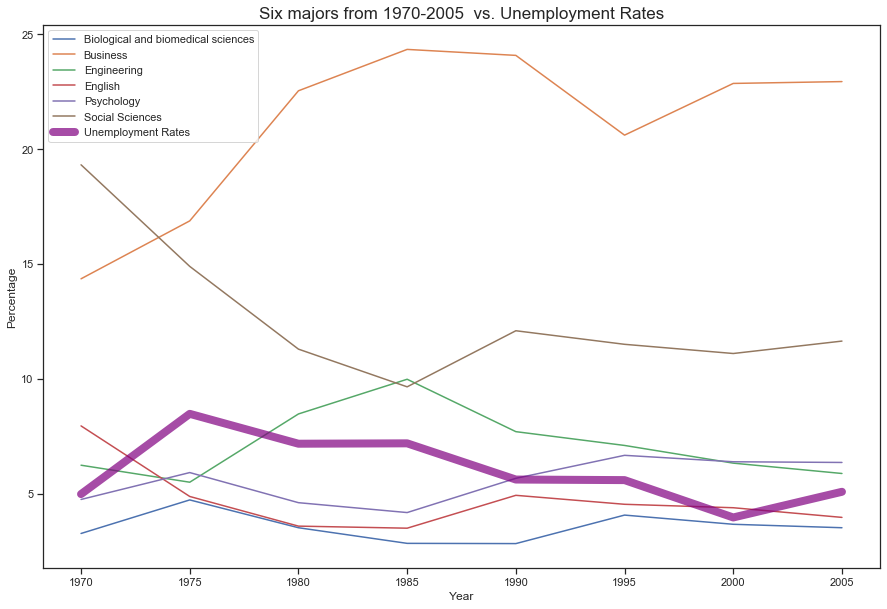

In [373]:
# get the array of mean in unemployment rates table. Data is every 5 years since 1970 to 2005
y7 = unemploy_rates_5years['Mean']

# set larger size for graph
plt.figure(figsize=(15,10))

# now graph them
plt.plot( x, y1, label = 'Biological and biomedical sciences' )
plt.plot( x, y2, label = 'Business' )
plt.plot( x, y3, label = 'Engineering' )
plt.plot( x, y4, label = 'English' )
plt.plot( x, y5, label = 'Psychology' )
plt.plot( x, y6, label = 'Social Sciences' )
plt.plot( x, y7, label = 'Unemployment Rates', marker='', linewidth=8, alpha=0.7,color= 'purple' )

# For cosmetics
plt.xlabel('Year', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.title("Six majors from 1970-2005  vs. Unemployment Rates", fontsize=17)
plt.legend()
colors = ['#E69F00', '#56B4E9', '#F0E442', '#009E73', '#D55E00']


***

# BAR GRAPH? 

In [374]:
six_majors_1970vs2005 = six_majors.iloc[::7, :]
six_majors_1970vs2005

,Biology,Business,Engineering,English,Pyschology,Social Sciences
Year,,,,,,
1970,3.27,14.35,6.24,7.95,4.75,19.31
2005,3.52,22.93,5.88,3.97,6.36,11.64


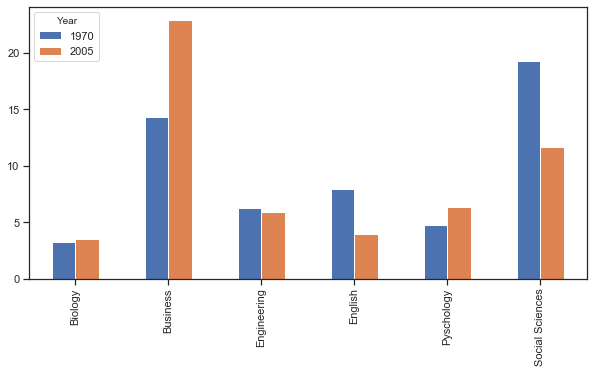

In [375]:
six_majors_1970vs2005.T.plot(kind='bar',figsize=(10,5) )


### SCATTER MATRIX OF SIX MAJORS (1970-2005)

In [376]:
df_matrix
df_UnemploymentRates['Mean'].values
df_matrix = df_matrix.assign(UnemploymentRates = df_UnemploymentRates['Mean'].values)
df_matrix.head()

,Biology,Business,Engineering,English,Pyschology,Social Sciences,UnemploymentRates
Year,,,,,,,
1970,3.27,14.35,6.24,7.95,4.75,19.31,4.983333
1971,3.30,14.67,6.17,7.66,5.22,19.01,5.950000
1972,3.64,14.79,6.00,7.07,5.59,18.20,5.600000
1973,4.13,15.11,5.76,6.19,5.95,17.17,4.858333
1974,4.55,15.71,5.54,5.53,6.02,15.89,5.641667


### Correlation dataframe

In [377]:
#convert the data to instantaneous rate
df_corr = np.log(df_matrix).diff()
df_corr = df_corr[1:]
df_corr.head()

,Biology,Business,Engineering,English,Pyschology,Social Sciences,UnemploymentRates
Year,,,,,,,
1971,0.009132,0.022055,-0.011281,-0.037160,0.094353,-0.015658,0.177292
1972,0.098061,0.008147,-0.027939,-0.080152,0.068482,-0.043544,-0.060625
1973,0.126294,0.021405,-0.040822,-0.132925,0.062412,-0.058258,-0.142071
1974,0.096850,0.038941,-0.038943,-0.112747,0.011696,-0.077474,0.149484
1975,0.038798,0.071239,-0.007246,-0.125043,-0.016751,-0.065000,0.406941


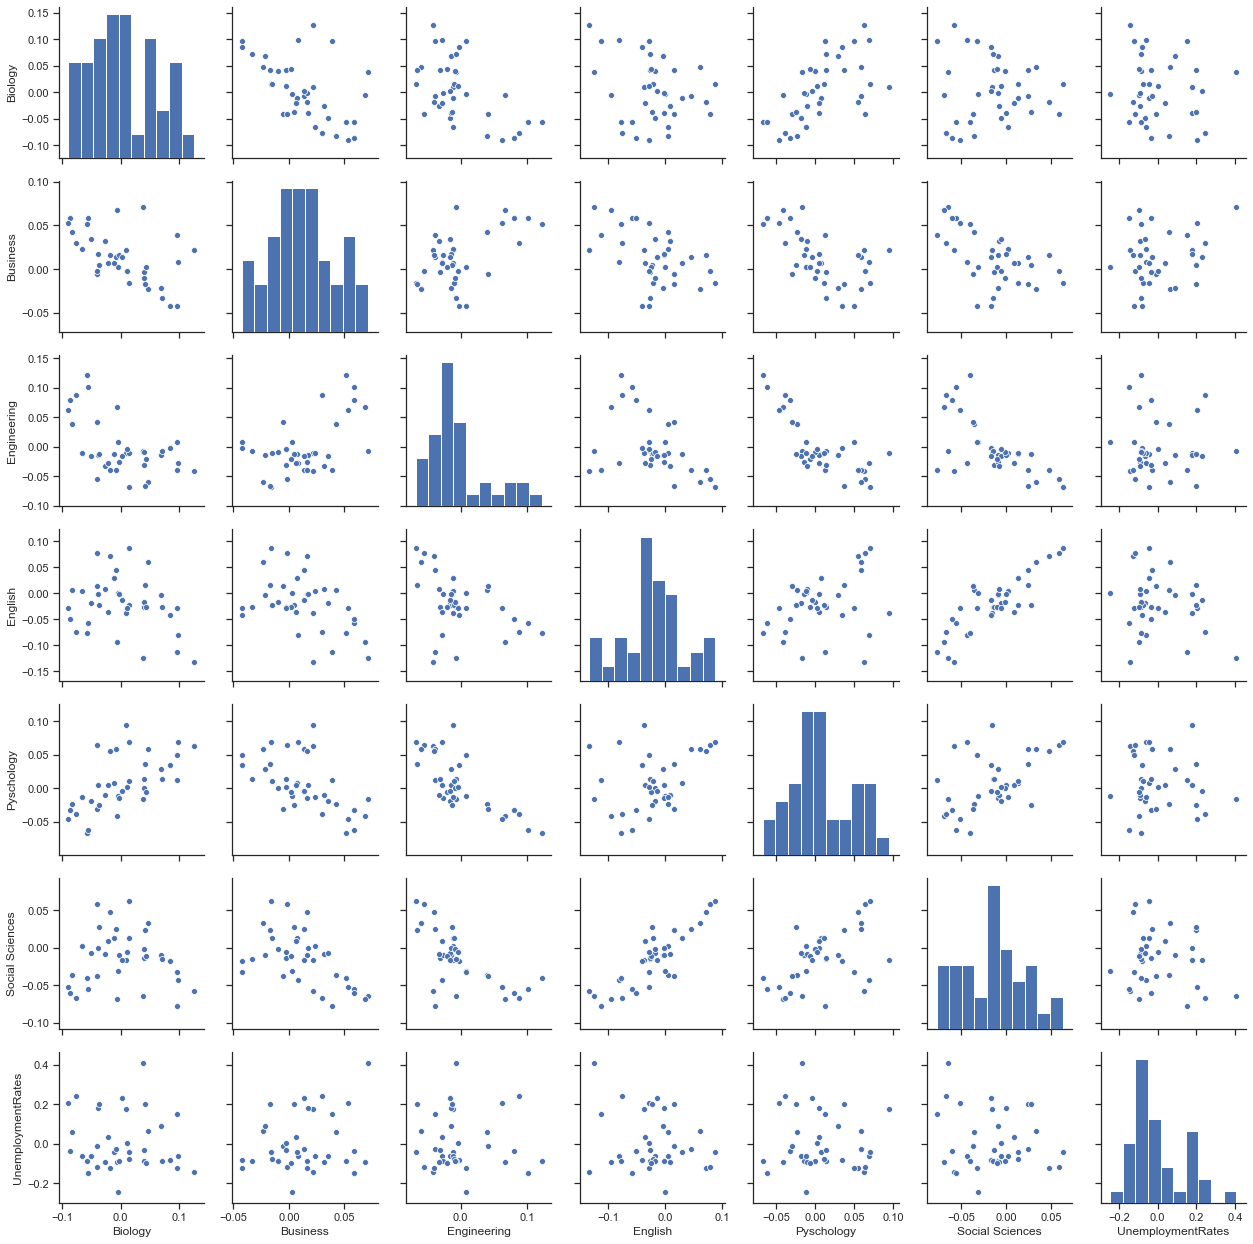

In [387]:
sns.set(style = "ticks", color_codes = True)
sns.pairplot(df_corr)

## Assess significance: mod_1

Looking at the significance between Business and Unemployment rate and using the alpha value of 0.01 we can see that the correlation shows that there is not a significant difference between the number of people that major in Business and the Unemployment rate from 1970 to 2005


In [388]:
outcome_1, predictors_1 = patsy.dmatrices('Business ~ UnemploymentRates', df_matrix)

mod_1 = sm.OLS(outcome_1, predictors_1)

res_1 = mod_1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:               Business   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.7195
Date:                Sun, 08 Dec 2019   Prob (F-statistic):              0.402
Time:                        00:38:37   Log-Likelihood:                -99.332
No. Observations:                  39   AIC:                             202.7
Df Residuals:                      37   BIC:                             206.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            19.5944      2.37

## Assess significance: mod_2

Looking at the prediction between Engineering, Business, Biology, Pyschology, and English from Unemployment rate and using the alpha value of 0.01 we can see that the correlation shows that there is a significant difference between the number of people that major in Engineering and the Unemployment rate from 1970 to 2005

In [389]:
outcome_2, predictors_2 = patsy.dmatrices('UnemploymentRates ~ Biology + Business + Engineering + English + Pyschology', df_matrix)

mod_2 = sm.OLS(outcome_2, predictors_2)

res_2 = mod_2.fit()
print(res_2.summary())

                            OLS Regression Results                            
Dep. Variable:      UnemploymentRates   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.375
Method:                 Least Squares   F-statistic:                     5.550
Date:                Sun, 08 Dec 2019   Prob (F-statistic):           0.000813
Time:                        00:38:37   Log-Likelihood:                -54.889
No. Observations:                  39   AIC:                             121.8
Df Residuals:                      33   BIC:                             131.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      17.6863     13.138      1.346      